<a href="https://colab.research.google.com/github/jljudge-gh/JupyterNotebooks-MathmaticalMethods-DataScience/blob/main/3_4_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.4 Logistic Regression

Logistic regression is a model that in its basic form uses a logistic function
to model a binary dependent variable. It can be extended to several classes
of events such as classfication of images. In this section, we illustrate the use of gradient descent on binary classification by logistic regression.

Given the input data is of the form $\left\{\left(\alpha_{i}, b_{i}\right): i=1, \ldots, n\right\}$ where $\alpha_{i} \in \mathbb{R}^{d}$ are the features and $b_{i} \in\{0,1\}$ is the label. As before we use a matrix representation: $A \in \mathbb{R}^{n \times d}$ has rows $\alpha_{j}^{T}, j=1, \ldots, n$ and $\mathbf{b}=\left(b_{1}, \ldots, b_{n}\right)^{T} \in\{0,1\}^{n}$. We wish to find a function of the features that approximates the probability of the label 1. For this purpose, we model the logit function of the probability of label 1 as a linear function of the features. Figure $3.11$ is the graph of the logit function.

For $\mathbf{x}, \alpha \in \mathbb{R}^{d}$, let $p(\alpha ; \mathbf{x})$ be the probability of the output to be 1 , we define

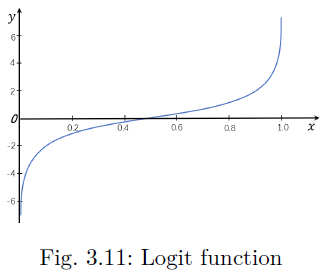

$$
\log \frac{p(\alpha ; \mathbf{x})}{1-p(\alpha ; \mathbf{x})}=\alpha^{T} \mathbf{x}
$$
Here $\alpha^{T} \mathbf{x}=\sum x_{i} \alpha_{i}$ can be viewed as a regression problem which seeks the best parameters ( $\mathbf{x}$ ) with given data $(\alpha)$. Rearranging this expression gives
$$
p(\alpha ; \mathbf{x})=\sigma\left(\alpha^{T} \mathbf{x}\right)
$$
where the sigmoid function is
$$
\sigma(t)=\frac{1}{1+e^{-t}}
$$
for $t \in \mathbb{R}$. To maximize the likelihood of the data, we assume the labels are independent given the features, which is given by
$$
\mathscr{L}(\mathbf{x} ; A, \mathbf{b})=\prod_{i=1}^{n} p\left(\alpha_{i} ; \mathbf{x}\right)^{b_{i}}\left(1-p\left(\alpha_{i} ; \mathbf{x}\right)\right)^{1-b_{i}}
$$
Taking a logarithm, multiplying by $-1 / n$ and substituting the sigmoid function, we want to minimize the cross-entropy loss.
$$
\ell(\mathbf{x} ; A, \mathbf{b})=-\frac{1}{n} \sum_{i=1}^{n} b_{i} \log \left(\sigma\left(\alpha^{T} \mathbf{x}\right)\right)-\frac{1}{n} \sum_{i=1}^{n}\left(1-b_{i}\right) \log \left(1-\sigma\left(\alpha^{T} \mathbf{x}\right)\right)
$$
That is, we solve
$$
\min _{\mathbf{x} \in \mathbb{R}^{d}} \ell(\mathbf{x} ; A, \mathbf{b})
$$
To use gradient descent, we need to compute the gradient of $\ell$. We use the Chain Rule and first compute the derivative of $\sigma$ which is
$$
\sigma^{\prime}(t)=\frac{e^{-t}}{\left(1+e^{-t}\right)^{2}}=\frac{1}{1+e^{-t}}\left(1-\frac{1}{1+e^{-t}}\right)=\sigma(t)(1-\sigma(t))
$$

It follows that $\sigma(t)$ satisfies the logistic differential equation. It arises in a variety of applications, including the modeling of population dynamics. Here it will be a convenient way to compute the gradient. Indeed observe that by the Chain Rule
$$
\nabla_{\mathbf{x}} \sigma\left(\alpha^{T} \mathbf{x}\right)=\sigma\left(\alpha^{T} \mathbf{x}\right)\left(1-\sigma\left(\alpha^{T} \mathbf{x}\right)\right) \alpha
$$
where we use a subscript $\mathbf{x}$ to make it clear that the gradient is with respect to $\mathbf{x}$.
With the same approach, we have
$$
\begin{aligned}
\nabla_{\mathbf{x}} \ell(\mathbf{x} ; A, \mathbf{b}) &=-\frac{1}{n} \sum_{i=1}^{n} \frac{b_{i}}{\sigma\left(\alpha_{i}^{T} \mathbf{x}\right)} \nabla_{\mathbf{x}} \sigma\left(\alpha_{i}^{T} \mathbf{x}\right)+\frac{1}{n} \sum_{i=1}^{n} \frac{1-b_{i}}{1-\sigma\left(\alpha_{i}^{T} \mathbf{x}\right)} \nabla_{\mathbf{x}} \sigma\left(\alpha_{i}^{T} \mathbf{x}\right) \\
&=-\frac{1}{n} \sum_{i=1}^{n}\left(\frac{b_{i}}{\sigma\left(\alpha_{i}^{T} \mathbf{x}\right)}-\frac{1-b_{i}}{1-\sigma\left(\alpha_{i}^{T} \mathbf{x}\right)}\right) \sigma\left(\alpha_{i}^{T} \mathbf{x}\right)\left(1-\sigma\left(\alpha_{i}^{T} \mathbf{x}\right)\right) \alpha_{i} \\
&=-\frac{1}{n} \sum_{i=1}^{n}\left(b_{i}-\sigma\left(\alpha_{i}^{T} \mathbf{x}\right)\right) \alpha_{i}
\end{aligned}
$$
To compute the Hessian, we note that
$$
\nabla_{\mathbf{x}}\left(\sigma\left(\alpha^{T} \mathbf{x}\right) \alpha_{j}\right)=\sigma\left(\alpha^{T} \mathbf{x}\right)\left(1-\sigma\left(\alpha^{T} \mathbf{x}\right)\right) \alpha \alpha_{j}
$$
so that
$$
\nabla_{\mathbf{x}}\left(\sigma\left(\alpha^{T} \mathbf{x}\right) \alpha\right)=\sigma\left(\alpha^{T} \mathbf{x}\right)\left(1-\sigma\left(\alpha^{T} \mathbf{x}\right)\right) \alpha \alpha^{T}
$$
Thus
$$
\nabla_{\mathbf{x}}^{2} \ell(\mathbf{x} ; A, \mathbf{b})=\frac{1}{n} \sum_{i=1}^{n} \sigma\left(\alpha_{i}^{T} \mathbf{x}\right)\left(1-\sigma\left(\alpha_{i}^{T} \mathbf{x}\right)\right) \alpha_{i} \alpha_{i}^{T}
$$
where $\nabla_{\mathbf{x}}^{2}$ indicates the Hessian with respect to the $\mathbf{x}$ variables. Now each $\alpha_{i} \alpha_{i}^{T}$ is a symmetric matrix and PSD. As a result, the function $\ell(\mathbf{x} ; A, \mathbf{b})$ is convex as a function of $\mathbf{x} \in \mathbb{R}^{d}$. We want to comment that convexity is one reason for working with the cross-entropy loss rather than the mean squared error.

To update iteration formula: for step size $\beta$, one step of gradient descent is therefore
$$
\mathbf{x}^{k+1}=\mathbf{x}^{k}+\beta \frac{1}{n} \sum_{i=1}^{n}\left(b_{i}-\sigma\left(\alpha_{i}^{T} \mathbf{x}^{k}\right)\right) \alpha_{i}
$$
In stochastic gradient descent, a variant of gradient descent, we pick a sample $I$ uniformly at random in $\{1, \ldots, n\}$ and update as follows
$$
\mathbf{x}^{k+1}=\mathbf{x}^{k}+\beta\left(b_{I}-\sigma\left(\alpha_{I}^{T} \mathbf{x}^{k}\right)\right) \alpha_{I}
$$

## Logistic Regression Formula

Logistic Regression in its base form (by default) is a Binary Classifier. This means that the target vector may only take the form of one of two values. In the Logistic Regression Algorithm formula, we have a Linear Model, e.g., $\beta_{0}+\beta_{1} x$, that is integrated into a Logistic Function (also known as a Sigmoid Function). The Binary Classifier formula that we have at the end is as follows:
$$
P\left(y_{i}=1 \mid X\right)=\frac{1}{1+e^{-\left(\beta_{0}+\beta_{2} x\right)}}
$$
Where:
- $\mathrm{P}\left(\mathrm{y}_{\mathrm{i}}=1 \mid \mathrm{X}\right)$ is the probability of the $\mathrm{i}^{\text {th }}$ observations target value, $\mathrm{y}_{\mathrm{i}}$ belonging to class 1 .
- $\mathrm{B}_{0}$ and $\beta_{1}$ are the parameters that are to be learned.
- erepresents Euler's Number.

The Logistic Regression formula aims to limit or constrain the Linear and/or Sigmoid output between a value of 0 and 1. The main reason is for interpretability purposes, i.e., we can read the value as a simple Probability; Meaning that if the value is greater than 0.5 class one would be predicted, otherwise, class 0 is predicted.

![](https://lh6.googleusercontent.com/N2TdJpFw4S_Sj67bbxdNLdtx9o5G2iVz5Okz6XcTieJNF7WWM0jAXdFIi8g4CtzpVWk3y1SlxdfP-RYzF92Hc1vXVEbRrHIrIG5wi6dPbeYQvk1zNmHcpnUpNzPBxWTInSj4Ywvn)

## Logistic Regression in Python

The following is an implementation of Logistic Regression in Python. For this exercise, we will be using the Ionosphere dataset which is available for download from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/ionosphere).

We begin by importing the necessary packages to be used for the Machine Learning problem


In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

We read the data into our system using Pandas'
'read_csv' method. This transforms the .csv file
into a Pandas DataFrame object.

In [13]:
dataframe = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data', header=None)


We configure the display settings of the
Pandas DataFrame.

In [14]:
pd.set_option('display.max_rows', 10000000000)
pd.set_option('display.max_columns', 10000000000)
pd.set_option('display.width', 95)

We view the shape of the dataframe. Specifically
the number of rows and columns present.

In [15]:
print('This DataFrame Has %d Rows and %d Columns'%(dataframe.shape))

This DataFrame Has 351 Rows and 35 Columns


We print the first five rows of our dataframe.


In [16]:
print(dataframe.head())

   0   1        2        3        4        5        6        7        8        9        10  \
0   1   0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000  0.03760  0.85243   
1   1   0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000 -0.04549  0.50874   
2   1   0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965  0.01198  0.73082   
3   1   0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000  0.00000  0.00000  0.00000   
4   1   0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255  0.77152 -0.16399  0.52798   

        11       12       13       14       15       16       17       18       19       20  \
0 -0.17755  0.59755 -0.44945  0.60536 -0.38223  0.84356 -0.38542  0.58212 -0.32192  0.56971   
1 -0.67743  0.34432 -0.69707 -0.51685 -0.97515  0.05499 -0.62237  0.33109 -1.00000 -0.13151   
2  0.05346  0.85443  0.00827  0.54591  0.00299  0.83775 -0.13644  0.75535 -0.08540  0.70887   
3  0.00000  0.00000  0.00000 -1.00000  0.14516  0.54094

In [17]:
# We isolate the features matrix from the DataFrame.
features_matrix = dataframe.iloc[:, 0:34]

# We isolate the target vector from the DataFrame.
target_vector = dataframe.iloc[:, -1]

# We check the shape of the features matrix, and target vector.
print('The Features Matrix Has %d Rows And %d Column(s)'%(features_matrix.shape))
print('The Target Matrix Has %d Rows And %d Column(s)'%(np.array(target_vector).reshape(-1, 1).shape))

The Features Matrix Has 351 Rows And 34 Column(s)
The Target Matrix Has 351 Rows And 1 Column(s)


We use scikit-learn's `StandardScaler` in order to
preprocess the features matrix data. This will
ensure that all values being inputted are on the same
scale for the algorithm.

In [18]:
features_matrix_standardized = StandardScaler().fit_transform(features_matrix)

We create an instance of the Logistic Regression Algorithm
We utilize the default values for the parameters and
hyperparameters.


In [19]:
algorithm = LogisticRegression(penalty='l2', dual=False, tol=1e-4,
C=1.0, fit_intercept=True,
intercept_scaling=1, class_weight=None,
random_state=None, solver='lbfgs',
max_iter=100, multi_class='auto',
verbose=0, warm_start=False, n_jobs=None,
l1_ratio=None)

# We utilize the 'fit' method in order to conduct the
# training process on our features matrix and target vector.

Logistic_Regression_Model = algorithm.fit(features_matrix_standardized, target_vector)

We create an observation with values, in order
to test the predictive power of our model.

In [20]:
observation = [[1, 0, 0.99539, -0.05889, 0.8524299999999999, 0.02306,
0.8339799999999999, -0.37708, 1.0, 0.0376,
0.8524299999999999, -0.17755, 0.59755, -0.44945, 0.60536,
-0.38223, 0.8435600000000001, -0.38542, 0.58212, -0.32192,
0.56971, -0.29674, 0.36946, -0.47357, 0.56811, -0.51171,
0.41078000000000003, -0.46168000000000003, 0.21266, -0.3409,
0.42267, -0.54487, 0.18641, -0.453]]

We store the predicted class value in a variable
called '`predictions`'.

In [21]:
predictions = Logistic_Regression_Model.predict(observation)

We print the model's predicted class for the observation.

In [22]:
print('The Model Predicted The Observation To Belong To Class %s'%(predictions))

The Model Predicted The Observation To Belong To Class ['g']


We view the specific classes the model was trained to predict.

In [23]:
print('The Algorithm Was Trained To Predict One Of The Two Classes: %s'%(algorithm.classes_))

The Algorithm Was Trained To Predict One Of The Two Classes: ['b' 'g']


In [24]:
print("""The Model Says The Probability Of The Observation We Passed Belonging To Class ['b'] Is %s"""%(algorithm.predict_proba(observation)[0][0]))
print()
print("""The Model Says The Probability Of The Observation We Passed Belonging To Class ['g'] Is %s"""%(algorithm.predict_proba(observation)[0][1]))

The Model Says The Probability Of The Observation We Passed Belonging To Class ['b'] Is 0.0077739316001402825

The Model Says The Probability Of The Observation We Passed Belonging To Class ['g'] Is 0.9922260683998597
